# Guía 2 - Ejercicio 4 

## Imports y definición de funciones

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import diferencia

def contar_hasta_cero(arreglo): #Función que retorno cuantos elementos hasta el proximo cero hay en un arreglo
    elementos_hasta_cero = 0

    for elemento in arreglo:
        if elemento != 0:
            elementos_hasta_cero += 1
        else:
            break

    return elementos_hasta_cero
def bounding_box(imagen):
    indices_objeto = np.where(imagen == 255)

    # Encuentra los límites superior, inferior, izquierdo y derecho del objeto
    top = np.min(indices_objeto[0])
    bottom = np.max(indices_objeto[0])
    left = np.min(indices_objeto[1])
    right = np.max(indices_objeto[1])
    # esquina_superior_izquierda = [left,top]
    # esquina_inferior_derecha = [right,bottom]

    return [left,right,top,bottom]#Izquierda, derecha, arriba, abajo

## Lectura de los datos

In [17]:

ruta1 = "Imagenes_Ej/blister_completo.jpg"
ruta2 = "Imagenes_Ej/blister_incompleto.jpg"

blister_completo = cv.imread(ruta1, cv.IMREAD_GRAYSCALE)
blister_completo = blister_completo[:,:291] #por que hay un pixel de diferencia en tamaño (?)
blister_incompleto = cv.imread(ruta2, cv.IMREAD_GRAYSCALE)

cv.imshow("Completo", blister_completo)
cv.imshow("Incompleto", blister_incompleto)
cv.waitKey(0)
cv.destroyAllWindows()

## Umbralización
Se le aplica a las imágenes un pre procesado para facilitar luego la operación de diferencia. Todos los valores mayores al umbral (100) se ponen en blanco y todos los menores en negro.

In [18]:
# Con un umbral de transición poner de forma tal que las pildoras queden en 255 y lo otro en 0
umbral = 100
blister_completo = np.where(blister_completo < umbral, 0, 255).astype(np.uint8)
# blister_completo = blister_completo[35:270,25:120]
blister_incompleto = np.where(blister_incompleto < umbral, 0, 255).astype(np.uint8)
# blister_incompleto = blister_incompleto[35:270,25:120] 
cv.imshow("Completo", blister_completo)
cv.imshow("Incompleto", blister_incompleto)
cv.waitKey(0)
cv.destroyAllWindows()

## Diferencia
Una vez pre procesada la imagen se aplica a realizar la operación de diferencia entre el blister lleno y el blister con faltante de pildoras para obtener las pildoras faltantes

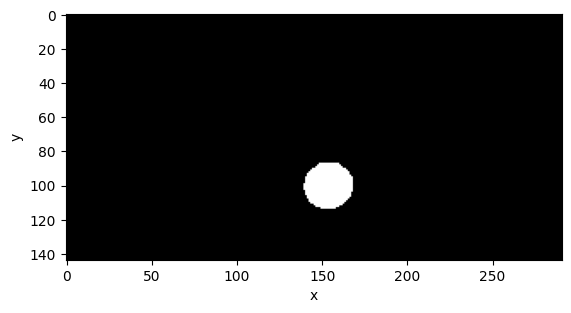

In [19]:
# Se puede usar la función find countours?
diferencia = diferencia(blister_completo, blister_incompleto)
#Con la diferencia contra la imagen llena se obtienen las pildoras que faltan 

#Gráficar con plot 35-270 , 25-120
plt.figure()
plt.imshow(diferencia,cmap='gray')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True,'minor')


## Bounding box
Se encuadra la pildora restante con un rectángulo

La posición de la pildora es ([153.0, 100.0])


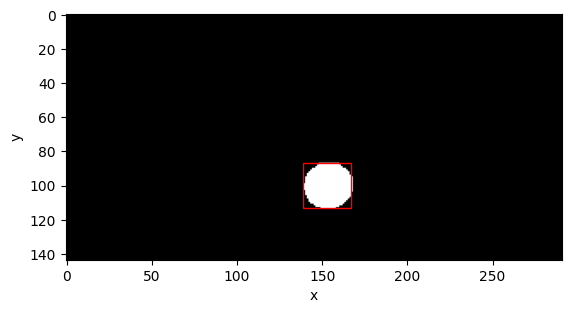

In [20]:
bordes = bounding_box(diferencia)
ancho = bordes[1] - bordes[0]
alto = bordes[3] - bordes[2] 
plt.figure()
plt.imshow(diferencia,cmap='gray')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True,'minor')
rectangulo = plt.Rectangle((bordes[0],bordes[2]),ancho,alto,linewidth=1,edgecolor='red',facecolor='none')
plt.gca().add_patch(rectangulo)
x = bordes[0] + ancho/2
y = bordes[2] + alto/2
posicion = [x,y]
print(f"La posición de la pildora es ({posicion})")
plt.show()